In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import collections
import scipy.sparse as sp_sparse
import tables
 
GeneBCMatrix = collections.namedtuple('GeneBCMatrix', ['gene_ids', 'gene_names', 'barcodes', 'matrix'])
 
def get_matrix_from_h5(filename, genome):
    with tables.open_file(filename, 'r') as f:
        try:
            group = f.get_node(f.root, genome)
        except tables.NoSuchNodeError:
            print("That genome does not exist in this file.")
            return None
        gene_ids = getattr(group, 'genes').read()
        gene_names = getattr(group, 'gene_names').read()
        barcodes = getattr(group, 'barcodes').read()
        data = getattr(group, 'data').read()
        indices = getattr(group, 'indices').read()
        indptr = getattr(group, 'indptr').read()
        shape = getattr(group, 'shape').read()
        matrix = sp_sparse.csc_matrix((data, indices, indptr), shape=shape)
        return GeneBCMatrix(gene_ids, gene_names, barcodes, matrix)
 
filtered_matrix_h5 = "./data/1m_mouse_scRNA/1M_neurons_neuron20k.h5"
genome = "mm10"
gene_bc_matrix = get_matrix_from_h5(filtered_matrix_h5, genome)

In [3]:
df = pd.DataFrame(gene_bc_matrix.matrix.todense(), index=list(map(lambda x: x.decode('UTF-8'), gene_bc_matrix.gene_names)), columns=list(map(lambda x: x.decode('UTF-8'), gene_bc_matrix.barcodes)))
df.head()

,AAAGATGCAGATGGGT-1,AAATGCCCAAGTTGTC-1,AACCATGAGCTGAAAT-1,AACCATGCACGAAACG-1,ACACCAAAGAGACGAA-1,ACACCAATCGGACAAG-1,ACACTGACATGTAGTC-1,ACGGAGAGTAAGGGCT-1,ACTTACTGTGTTGAGG-1,ACTTGTTAGTGAATTG-1,...,TTCCCAGCATCACGAT-133,TTCGAAGTCTCCTATA-133,TTCTACACAGCTGTGC-133,TTCTCAATCACCGGGT-133,TTGAACGGTCGTCTTC-133,TTGGAACGTCTCCCTA-133,TTGGCAAGTTTGGCGC-133,TTTCCTCTCCTAGGGC-133,TTTGGTTCAGTAAGCG-133,TTTGGTTTCCTGCCAT-133
Xkr4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
len(df.loc['Abcd1'].nonzero()[0]) / 20000

0.0265

In [6]:
df.astype(bool).sum(axis=1) / len(df.T)

Xkr4              0.01230
Gm1992            0.00000
Gm37381           0.00000
Rp1               0.00075
Rp1               0.00000
Sox17             0.00935
Gm37323           0.00010
Mrpl15            0.39340
Lypla1            0.14510
Gm37988           0.00015
Tcea1             0.33340
Rgs20             0.05230
Gm16041           0.00015
Atp6v1h           0.30425
Oprk1             0.00070
Npbwr1            0.00020
Rb1cc1            0.32100
4732440D04Rik     0.02420
Fam150a           0.00005
St18              0.02205
Pcmtd1            0.27045
Gm26901           0.01340
Gm30414           0.00000
Sntg1             0.01265
Rrs1              0.20690
Adhfe1            0.01110
3110035E14Rik     0.05875
Gm29520           0.00000
Mybl1             0.00995
Vcpip1            0.13100
                   ...   
AC164084.3        0.00000
AC164084.1        0.00000
AC140325.2        0.00000
AC140325.1        0.00000
Gm3286            0.00000
AC140325.3        0.00000
AC140325.4        0.00000
Ccl27a      

In [7]:
_.mean()

0.071809948924923206

In [22]:
abcd1_and_friends = ['Abcd1','Abcd2','Abcd3','Arf1','Atox1','Bsg',
                    'Coro1a','Coro1b','Coro1c','Coro2a','Coro2b','Coro6',
                    'Eef1a1','Eef1a2','Eef1akmt1','Eif1','Eif1b','Eno1',
                    'Eno2','Eno3','Glrx','Glrx2','Hspa1a','Hspa1b','Hspa1l',
                    'Hspa2','Hspa5','Hspa6','Hspa8','Hspa9','Iqcf1','Lsm1',
                    'Ntrk1','Pbdc1','Pex14','Pex19','Pex3','Pfdn6','Plpp4',
                    'Pot1','Ppid','Prdx5','Prmt1','Prmt8','Rab5c','Rab7a',
                    'Rcc1','Rpsa','Slc27a2','Slc39a4','Sumo2','Terf2','Txn',
                    'Ubc','Ube2k','Upf1','Vapa','Vps26b','Xrn1']

In [23]:
len(abcd1_and_friends), len(df.loc[abcd1_and_friends])

/Users/alex/Documents/abcd1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


(59, 59)

In [37]:
friends_cov = df.loc[abcd1_and_friends].T.cov()
friends_cov = friends_cov.dropna(how='all').T.dropna(how='all')
friends_cov.head()

,Abcd1,Abcd2,Abcd3,Arf1,Atox1,Bsg,Coro1a,Coro1b,Coro1c,Coro2a,...,Slc27a2,Slc39a4,Sumo2,Terf2,Ubc,Ube2k,Upf1,Vapa,Vps26b,Xrn1
Abcd1,0.027714,0.001670,0.005639,0.024330,0.022032,0.108831,0.003808,0.005828,0.007130,0.000320,...,0.000036,0.000039,0.079277,0.002565,0.032972,0.012200,0.003382,0.019313,0.003498,0.001929
Abcd2,0.001670,0.125346,0.015837,0.058222,0.019064,-0.012387,0.002798,0.013432,0.054746,-0.000072,...,-0.000050,-0.000040,0.369854,0.006031,0.087445,0.031943,0.005463,0.038762,0.008932,0.008287
Abcd3,0.005639,0.015837,0.375846,0.248822,0.183753,0.756154,0.005161,0.044673,0.077517,0.001206,...,0.000064,0.000142,0.935832,0.025340,0.384623,0.132468,0.028067,0.224324,0.037081,0.020790
Arf1,0.024330,0.058222,0.248822,3.510285,1.389923,7.353202,0.161706,0.262257,0.530982,0.012226,...,0.000840,0.000132,5.152182,0.110031,1.937178,0.703700,0.112562,1.049722,0.227533,0.099687
Atox1,0.022032,0.019064,0.183753,1.389923,3.936204,17.030508,0.089213,0.279482,0.520823,0.013113,...,0.000507,0.001866,2.907782,0.103923,1.793367,0.533596,0.114120,0.642055,0.164904,0.099641


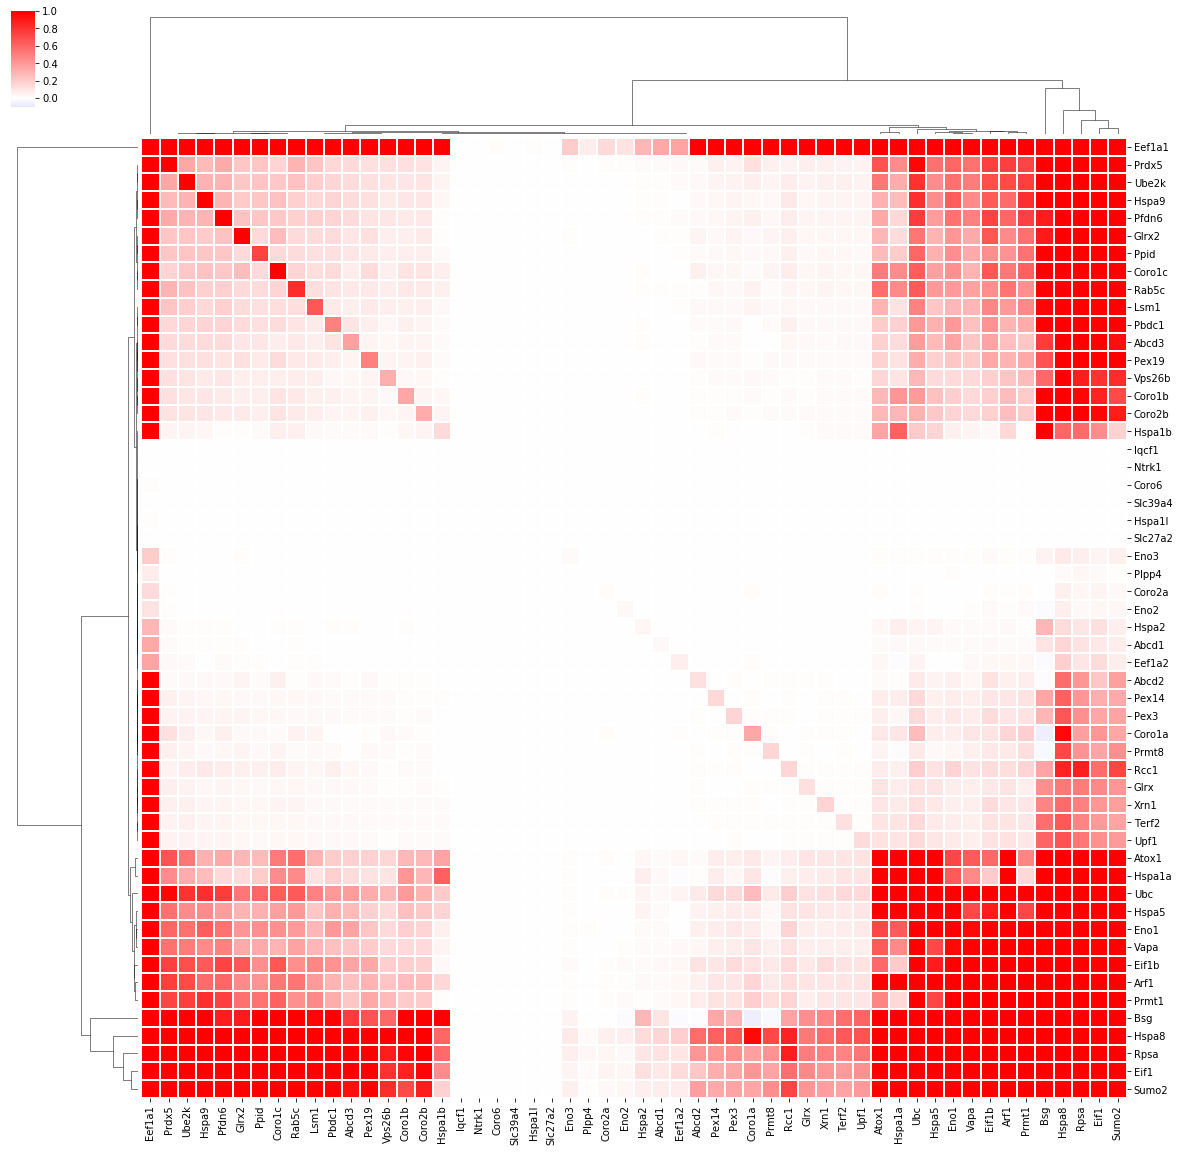

In [48]:
sns.clustermap(friends_cov, method='complete', cmap='bwr', linewidths=1, figsize=(20, 20), vmin=-0.1, vmax=1, center=0)

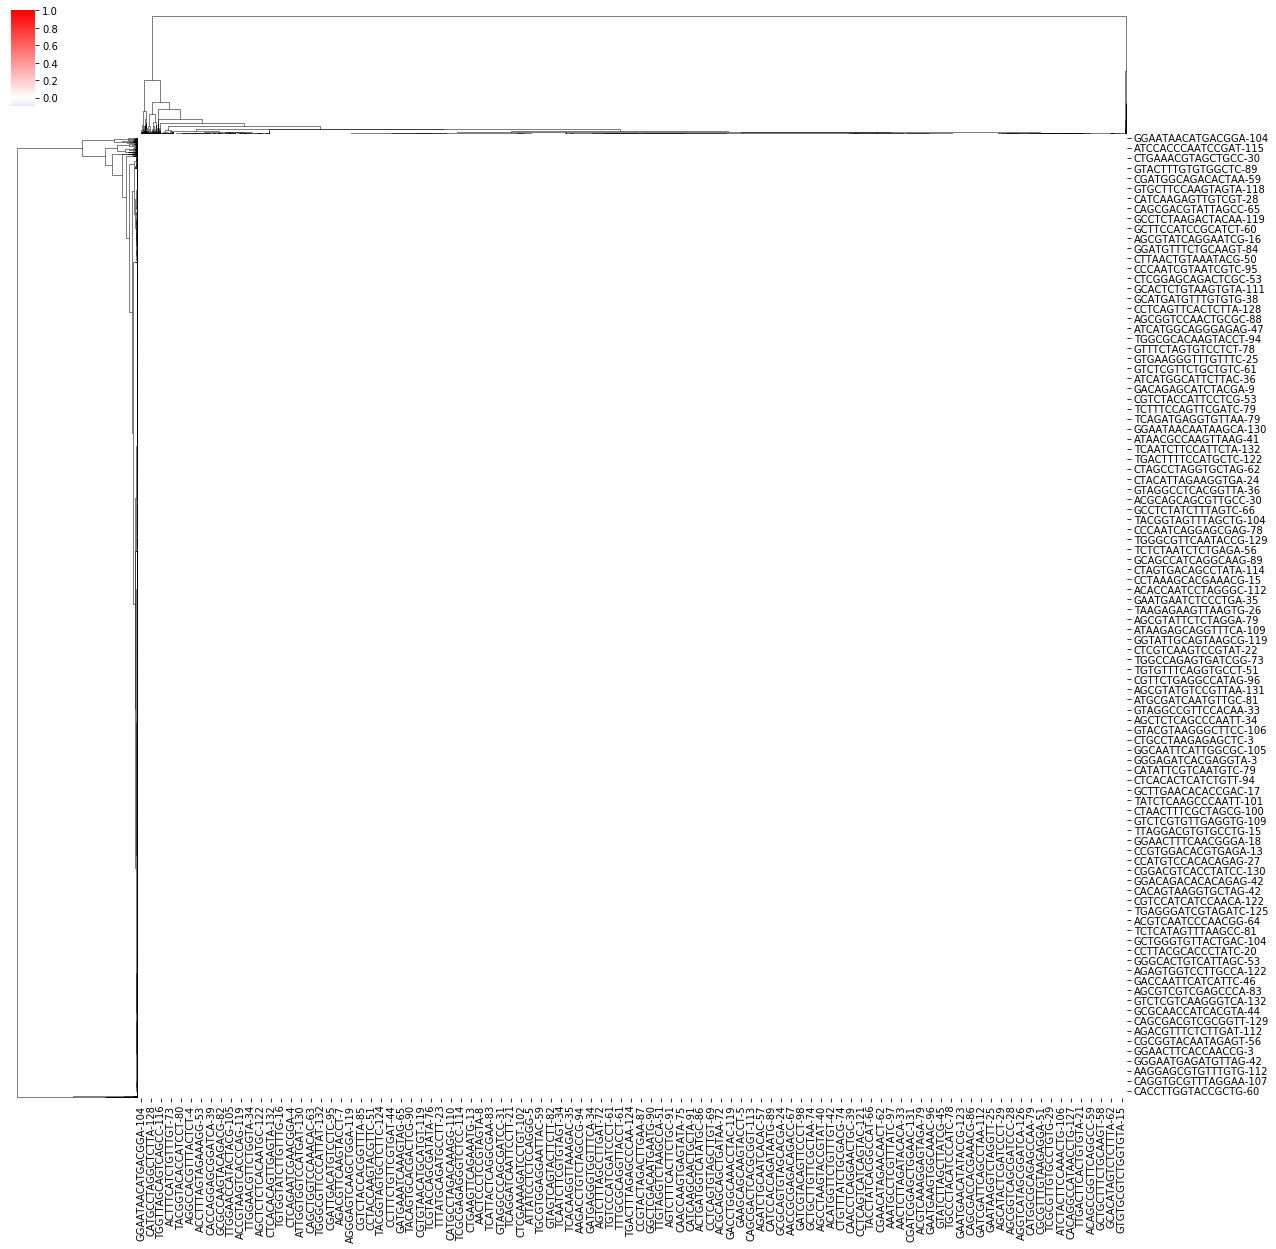

In [49]:
sns.clustermap(df.cov().dropna(how='all').T.dropna(how='all'), method='complete', cmap='bwr', linewidths=1, figsize=(20, 20), vmin=-1, vmax=1, center=0)

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

y = (df.loc['Abcd1'] != 0).astype(int)
pca = PCA(n_components=2)
Y = pca.fit_transform(df.T)

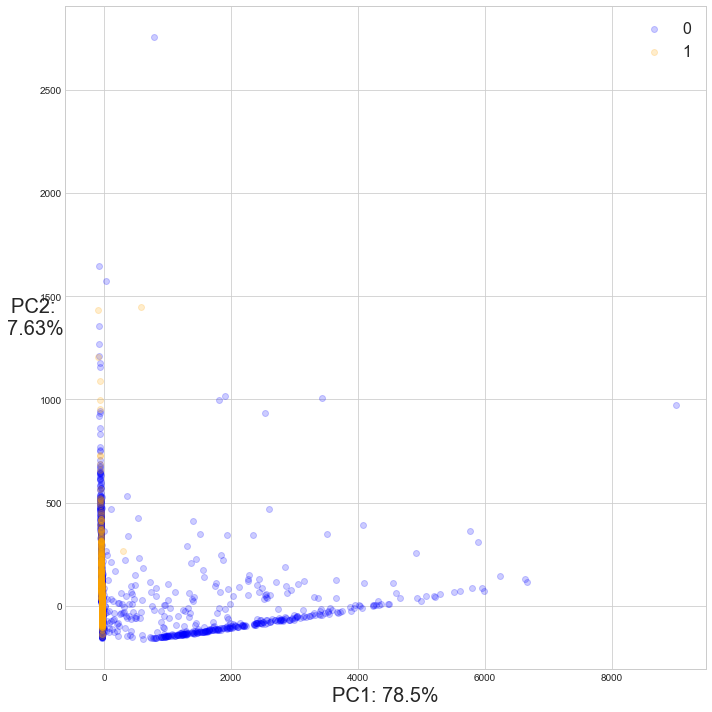

In [66]:
with plt.style.context('seaborn-whitegrid'):
    for label, color in zip((0, 1), ("blue", "orange")):
        plt.scatter(Y[y==label,0], Y[y==label,1], label=label, c=color, alpha=0.2) 
        
#     for i, txt in enumerate(df.columns):
#         plt.annotate(txt, (Y[i,0],Y[i,1]), fontsize=13)
        
    plt.xlabel('PC1: '+str(pca.explained_variance_ratio_[0]*100)[:4]+'%', fontsize=20)
    plt.ylabel('PC2: \n'+str(pca.explained_variance_ratio_[1]*100)[:4]+'%', fontsize=20, rotation=0)
    plt.legend(loc='upper right',prop={'size':16})
    plt.tight_layout()
    plt.show()

In [ ]:
y = (df.loc['Abcd1'] != 0).astype(int)
pca = PCA(n_components=100)
Y = pca.fit_transform(df.T)

In [ ]:
df.T.shape, Y.shape

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=100, perplexity=10)
Y = tsne.fit_transform(df.T)

with plt.style.context('seaborn-whitegrid'):
    for label, color in zip((0, 1), ("blue", "orange")):
        plt.scatter(Y[y==label,0], Y[y==label,1], label=label, c=color, alpha=0.2) 
        
#     for i, txt in enumerate(df.columns):
#         plt.annotate(txt, (Y[i,0],Y[i,1]), fontsize=13)
        
    plt.xlabel('TNSE 1', fontsize=20)
    plt.ylabel('TSNE 2', fontsize=20, rotation=0)
    plt.legend(loc='upper right',prop={'size':16})
    plt.tight_layout()
    plt.show()